#                                             CVS

### Data collection

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [4]:
mydata.head()

,CVS
Date,
1995-01-03,4.515667
1995-01-04,4.497676
1995-01-05,4.515667
1995-01-06,4.515667
1995-01-09,4.479684


In [5]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

CVS    4.515667
Name: 1995-01-03 00:00:00, dtype: float64

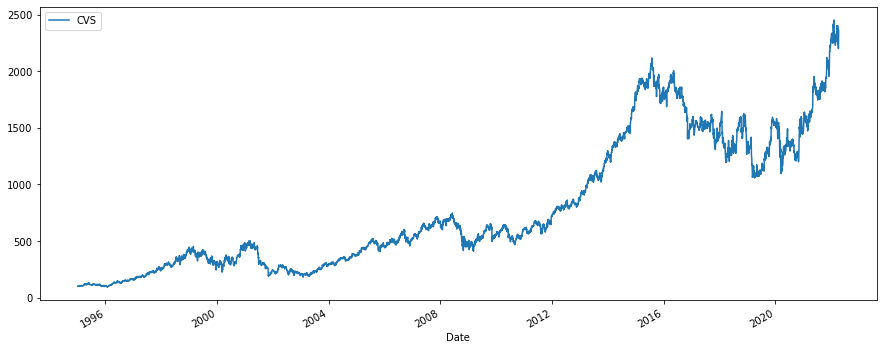

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on date:

In [8]:
mydata.loc['2019-09-26']

CVS    57.472229
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [9]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [10]:
weights = np.array([1])

In [11]:
np.dot(returns, weights)

array([        nan, -0.00398404,  0.00399997, ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [12]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [13]:
np.dot(annual_returns, weights)

0.16148300038760413

In [14]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [15]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [16]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
1999-12-31,NaN,NaN
2000-01-03,-0.053110,NaN
2000-01-04,-0.008299,NaN
2000-01-05,0.053541,NaN
2000-01-06,-0.073743,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [17]:
returns['CVS'].std()

0.018735887977384104

Annual risk:

In [18]:
returns['CVS'].std() * 250 ** 0.5

0.29624039997149537

### S&P 500

Daily risk:

In [19]:
returns['VOO'].std()

0.010752515904792185

Annual risk:

In [20]:
returns['VOO'].std() * 250 ** 0.5

0.17001220418164756

******

### Volatility:

In [21]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.296240
VOO    0.170012
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

*****

In [22]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000351,0.000090
VOO,0.000090,0.000116


In [23]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.087758,0.022624
VOO,0.022624,0.028904


***

In [24]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.562736
VOO,0.562736,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [25]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [26]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.040477498154250904

Portfolio Volatility:

In [27]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.20119020392218628

In [28]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

20.1 %


***

# The diversifiable and non diversifiable risks of a porfolio

In [29]:
tickers = ['CVS', 'VOO']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']
    
sec_data

,CVS,VOO
Date,,
2007-01-03,23.362818,NaN
2007-01-04,23.484024,NaN
2007-01-05,23.612804,NaN
2007-01-08,23.749166,NaN
2007-01-09,23.491602,NaN
...,...,...
2022-04-04,100.000000,419.850006
2022-04-05,99.459999,414.660004
2022-04-06,102.059998,410.459991


In [30]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3845 entries, 2007-01-03 to 2022-04-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     3845 non-null   float64
 1   VOO     2917 non-null   float64
dtypes: float64(2)
memory usage: 90.1 KB


Then, calculate the diversifiable and the non-diversifiable risk of a portfolio, composed of these two stocks:

a) with weights 0.5 and 0.5;

In [31]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,CVS,VOO
Date,,
2007-01-03,NaN,NaN
2007-01-04,0.005175,NaN
2007-01-05,0.005469,NaN
2007-01-08,0.005758,NaN
2007-01-09,-0.010904,NaN
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### Calculating Portfolio Variance

Weightings scheme:

In [32]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [33]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.03627867900178222

### Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

Diversifiable Risk:

In [34]:
CVS_var_a = sec_returns[['CVS']].var() * 250
CVS_var_a

CVS    0.070963
dtype: float64

In [35]:
VOO_var_a = sec_returns[['VOO']].var() * 250
VOO_var_a

VOO    0.028904
dtype: float64

Calculating Diversifiable Risk:

In [36]:
dr = pfolio_var - (weights[0] ** 2 * CVS_var_a) - (weights[1] ** 2 * VOO_var_a)
dr

CVS   NaN
VOO   NaN
dtype: float64

In [37]:
print (str(round(dr*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


Calculating Non-Diversifiable Risk:

In [38]:
n_dr_1 = pfolio_var - dr
n_dr_1

CVS   NaN
VOO   NaN
dtype: float64

In [39]:
print (str(round(n_dr_1*100, 3)) + ' %')

CVS   NaN
VOO   NaN
dtype: float64 %


*****

# Testing different weight combination for a porfolio. 

In [40]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [41]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.2225321 , 0.61431561, 0.16315229])

Expected Portfolio Return:

In [42]:
np.sum(weights * log_returns.mean()) * 250

0.06597965087309761

Expected Portfolio Variance:

In [43]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.12596070443809557

Expected Portfolio Volatility:

In [44]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.35490943131747793

In [45]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [46]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
weights_1, weights_2, weights_3, pf_returns, pf_volatilities

([0.3276444624945816,
  0.2031330213223251,
  0.3097265974007339,
  0.36884971250070964,
  0.12223228893910938,
  0.20353959017485332,
  0.26252273962724404,
  0.34050731927606803,
  0.4731574906128919,
  0.5584542458777657,
  0.3599524566324902,
  0.11270580840435801,
  0.03475484563028719,
  0.23895535191136746,
  0.37111244867161275,
  0.5573690925513306,
  0.26396382045923444,
  0.485597561723374,
  0.42511363552973114,
  0.11147358822608315,
  0.36622336664632615,
  0.0044345089793436316,
  0.3177400334251732,
  0.7688280533758252,
  0.4169455585580971,
  0.49053336337548,
  0.0662827120544214,
  0.4221894901510312,
  0.45486909845632384,
  0.5582605859805814,
  0.5347313000235038,
  0.45198561906993356,
  0.5600389266207126,
  0.2712115454584741,
  0.0031269340429763174,
  0.15089143184587414,
  0.15571828586774356,
  0.46915326265173907,
  0.5043241313968017,
  0.5218628182573207,
  0.4874660472462861,
  0.133830722742124,
  0.4164939819439074,
  0.28614994941502236,
  0.3598641

In [47]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)

weights_1, weights_2, weights_3, pf_returns, pf_volatilities

(array([0.32764446, 0.20313302, 0.3097266 , 0.36884971, 0.12223229,
        0.20353959, 0.26252274, 0.34050732, 0.47315749, 0.55845425,
        0.35995246, 0.11270581, 0.03475485, 0.23895535, 0.37111245,
        0.55736909, 0.26396382, 0.48559756, 0.42511364, 0.11147359,
        0.36622337, 0.00443451, 0.31774003, 0.76882805, 0.41694556,
        0.49053336, 0.06628271, 0.42218949, 0.4548691 , 0.55826059,
        0.5347313 , 0.45198562, 0.56003893, 0.27121155, 0.00312693,
        0.15089143, 0.15571829, 0.46915326, 0.50432413, 0.52186282,
        0.48746605, 0.13383072, 0.41649398, 0.28614995, 0.35986417,
        0.1306909 , 0.89812645, 0.33887579, 0.38492772, 0.44057179,
        0.14167554, 0.11923188, 0.44078727, 0.2364938 , 0.73761981,
        0.31262003, 0.21896573, 0.30506959, 0.30292153, 0.52918725,
        0.35921822, 0.05940158, 0.56186899, 0.32689724, 0.24321243,
        0.36892043, 0.18179726, 0.2172292 , 0.38053734, 0.29628756,
        0.16482674, 0.18931657, 0.30478376, 0.25

In [48]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'WMT_weights' : weights_1, 'FB_weights': weights_2, 'BP_weights': weights_3})

In [49]:
portfolios.head()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
0,0.101965,0.288839,0.327644,0.430484,0.241871
1,0.073642,0.301386,0.203133,0.473087,0.323780
2,0.086853,0.340783,0.309727,0.571766,0.118508
3,0.118964,0.256452,0.368850,0.323002,0.308148
4,0.045164,0.357838,0.122232,0.624143,0.253624


In [50]:
portfolios.tail()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
995,0.163723,0.269636,0.588111,0.310649,0.101240
996,0.152868,0.213633,0.426456,0.048584,0.524959
997,0.070477,0.328287,0.217351,0.546586,0.236063
998,0.166393,0.230912,0.542611,0.166783,0.290607
999,0.051802,0.403919,0.200223,0.733422,0.066354


Text(0, 0.5, 'Expected Return')

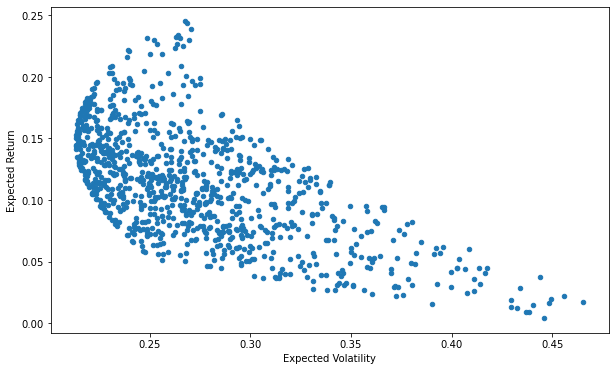

In [51]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [52]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '01-01-2012', end = '12-31-2016')['Adj Close']
    

In [53]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [54]:
cov = stock_return.cov()*250

In [55]:
cov_with_market = cov.iloc[0,1]

In [56]:
market_var = stock_return['^GSPC'].var()*250

In [57]:
stock_beta = cov_with_market / market_var

stock_beta

0.7844137158385283

# Calculated expected return for a stock


### $$
\overline{r_{pg}} = r_f + \beta_{pg}(\overline{r_{m}} - r_f) 
$$

In [58]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.06622068579192641

**Sharpe ratio:**
### $$
Sharpe = \frac{\overline{r_{pg}} - r_f}{\sigma_{pg}}
$$

In [59]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.2650371431652614

# Monte Carlo- Predicting Gross Profit

In [60]:
import numpy as np 
import matplotlib.pyplot as plt

In [61]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [62]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([142.38202307, 191.44569645, 172.52216835, 151.02092868,
       152.79062147, 144.37468729, 174.64400857, 173.82537393,
       176.44358603, 170.7410926 , 189.99352834, 162.59046166,
       179.42386342, 150.24925039, 163.73631104, 171.05965871,
       191.09465164, 197.50242248, 189.68309241, 116.11192572,
       153.55243613, 153.87581723, 166.32202841, 191.98287098,
       182.66436871, 199.28759929, 170.59066607, 178.08440933,
       168.73076036, 177.0582406 , 199.58193609, 169.84705551,
       165.83503958, 162.85936233, 196.49966961, 187.18641866,
       149.05371494, 165.85785613, 217.20771107, 163.33520419,
       179.42018805, 176.17529323, 218.46566411, 162.66942554,
       144.00666398, 178.65690098, 163.17564234, 179.99232865,
       158.72392751, 167.91491571, 162.74046707, 180.2940329 ,
       149.21293494, 144.4366181 , 151.61286709, 157.59597143,
       162.04657646, 148.81791426, 155.86827839, 157.67949566,
       159.87436432, 178.34395513, 214.93277639, 170.33

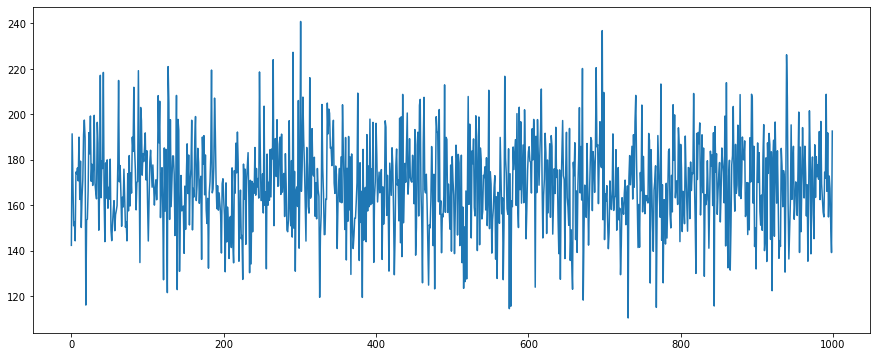

In [63]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

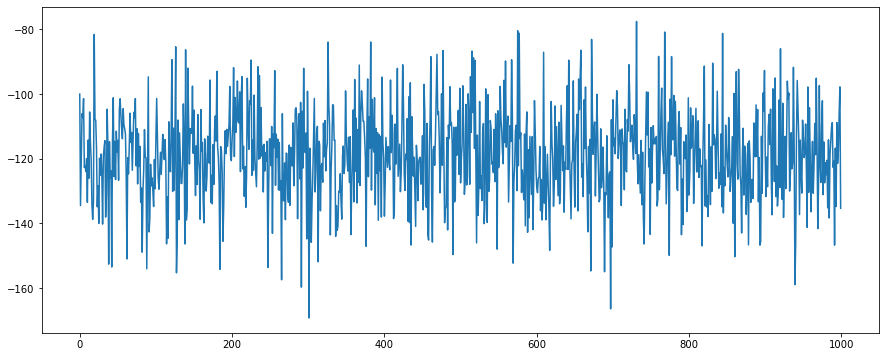

In [64]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [65]:
COGS.mean()

-118.80809741222912

In [66]:
COGS.std()

14.118565826672238

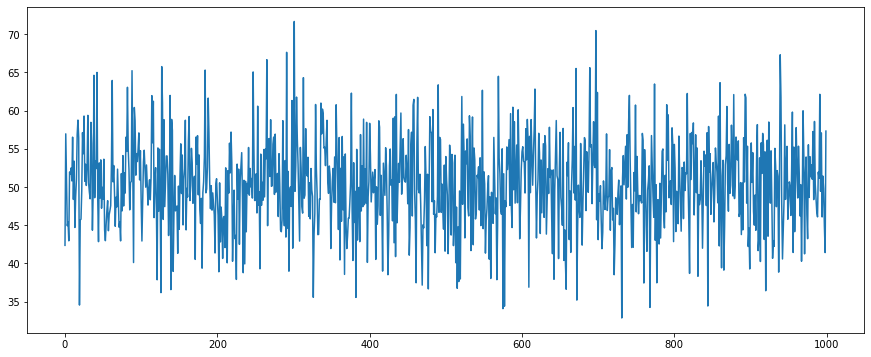

In [67]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [68]:
max(Gross_Profit)

71.68133623780923

In [69]:
min(Gross_Profit)

32.859540440610914

In [70]:
Gross_Profit.mean()

50.330024018332296

In [71]:
Gross_Profit.std()

5.980970764099428

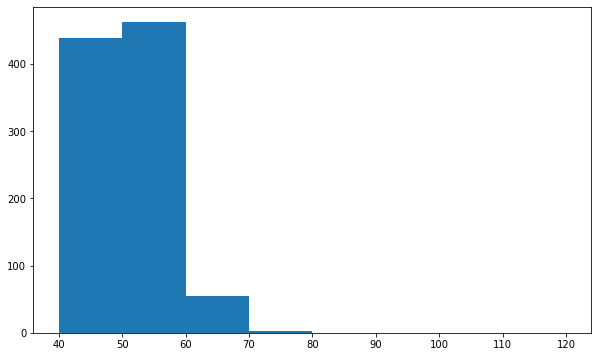

In [72]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

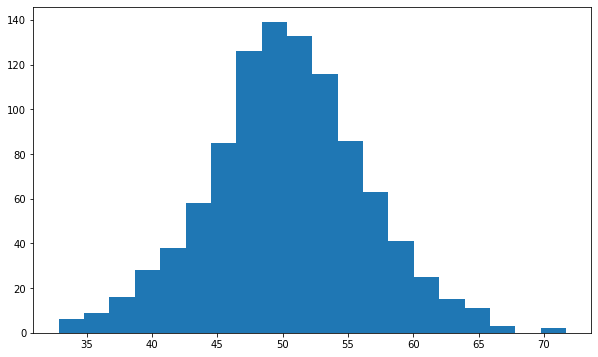

In [73]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [74]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [75]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [76]:
log_return = np.log(1 + data.pct_change())

In [77]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


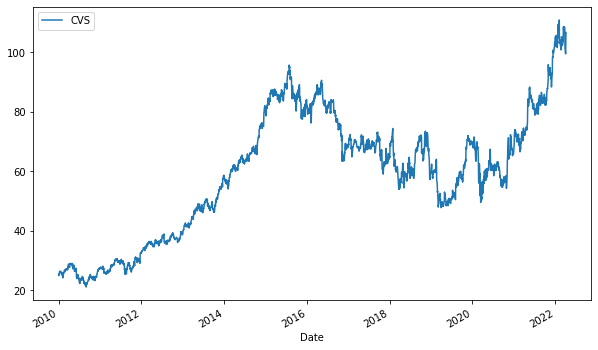

In [78]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

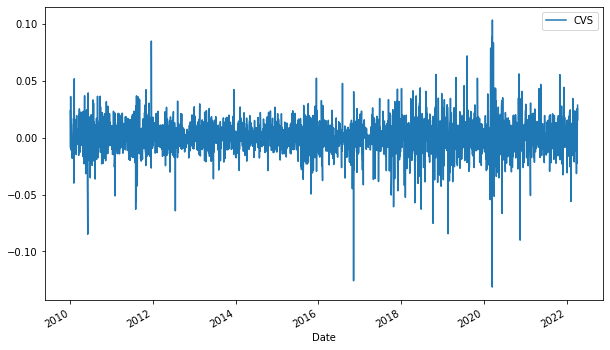

In [79]:
log_return.plot(figsize= (10, 6))

In [80]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [81]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [82]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [83]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [84]:
type(drift)

pandas.core.series.Series

In [85]:
type(stdev)

pandas.core.series.Series

In [86]:
np.array(drift)

array([0.00035668])

In [87]:
drift.values

array([0.00035668])

In [88]:
stdev.values

array([0.01503762])

In [89]:
norm.ppf(0.95)

1.6448536269514722

In [90]:
x = np.random.rand(10,2)
x

array([[0.1913357 , 0.16776593],
       [0.97090503, 0.29612754],
       [0.81831437, 0.41258073],
       [0.75804048, 0.57045764],
       [0.41199283, 0.84216567],
       [0.35036631, 0.7659596 ],
       [0.33677354, 0.6620036 ],
       [0.90002038, 0.32469029],
       [0.94272244, 0.82216336],
       [0.55514491, 0.53983764]])

In [91]:
norm.ppf(x)

array([[-0.87298473, -0.96303123],
       [ 1.89426433, -0.53557101],
       [ 0.90895997, -0.22091134],
       [ 0.70001323,  0.1775394 ],
       [-0.22242164,  1.00339845],
       [-0.3843317 ,  0.72560526],
       [-0.42128485,  0.41793751],
       [ 1.28166768, -0.45462286],
       [ 1.57804562,  0.92364098],
       [ 0.13867094,  0.10002469]])

In [92]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.3067395 , -0.27634509],
       [-0.63103395,  0.42642202],
       [-0.62384338,  0.26905664],
       [ 0.82976207,  0.72426988],
       [-1.37787385,  0.0110838 ],
       [-0.75334985,  1.69492778],
       [ 1.95621586, -0.88891943],
       [-0.05814121, -1.75819497],
       [ 0.88832186,  0.64144352],
       [ 0.41931392,  1.46992195]])

In [93]:
t_intervals = 1000
iterations = 10 

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot z
$$

In [94]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [95]:
daily_returns

array([[0.9940478 , 0.98472462, 1.03006185, ..., 0.99533735, 1.00583547,
        1.00336885],
       [1.00941765, 0.9743099 , 1.00810072, ..., 0.98992861, 1.00091639,
        1.00507505],
       [1.01794103, 0.99993771, 1.00614851, ..., 1.00043474, 1.01283669,
        1.00460035],
       ...,
       [1.01281183, 1.00461359, 1.01654262, ..., 0.99169837, 1.01400653,
        0.99469558],
       [1.0081989 , 1.00135886, 1.01305677, ..., 1.00098928, 1.01342906,
        1.01029823],
       [1.00006039, 1.01594253, 0.99868812, ..., 1.00545002, 1.00480961,
        0.9840627 ]])

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [96]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [97]:
price_list = np.zeros_like(daily_returns)

In [98]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [100]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [101]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [107.61401595, 103.87117854, 107.47361848, ..., 105.53628924,
        106.7076974 , 107.1510512 ],
       [109.54472217, 103.86470874, 108.13442156, ..., 105.58216998,
        108.07747063, 107.64398363],
       ...,
       [136.81591591, 249.23418966, 100.94200788, ..., 270.4441841 ,
        123.71337839, 162.0679799 ],
       [137.93765647, 249.57286421, 102.25998462, ..., 270.71172838,
        125.37473324, 163.73699284],
       [137.94598711, 253.5516868 , 102.12583184, ..., 272.18711247,
        125.9777373 , 161.12746739]])

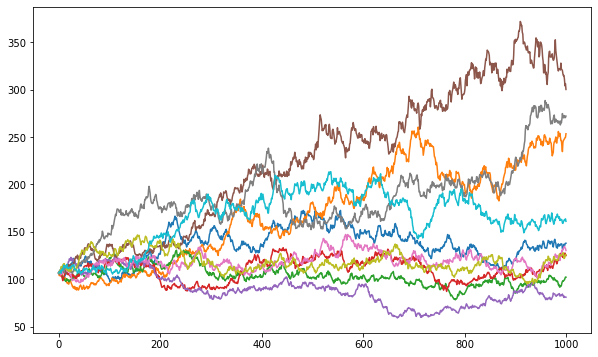

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);